In [15]:
from tqdm import tqdm
import os
import bs4
from bs4 import BeautifulSoup
DATA_DIR = 'data/www18/'
RESULT_DIR = DATA_DIR + 'SearchResults'

doc_text_map = {}
doc_topic_map = {}

def process_html(file_path):
    """
    处理 HTML 文件的函数。
    参数：
        file_path: html 文件的路径。
    """
    # 提取 task, user_id 和 query 编号
    task, user_id, query_folder, _ = file_path.rsplit('/', 3)
    task_num = task.replace('data/www18/SearchResults/task', '')
    query_num = query_folder.split('_', 1)[0].replace('query', '')
    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file.read(), 'html.parser')
        # 查找所有 class 为 b_algo 的 li 元素
        results = soup.find_all('li', class_='b_algo')
        for i, result in enumerate(results):
            # 提取 url
            url = result.find('h2').a['href'] if result.find('h2') and result.find('h2').a else ""
            # 提取 title
            title = result.find('h2').get_text(strip=True) if result.find('h2') else ""
            # 提取 content
            content = result.find('div', class_='b_caption').p.get_text(strip=True) if result.find('div', class_='b_caption') and result.find('div', class_='b_caption').p else ""
            # 拼接 title 和 content
            full_text = f"{title} {content}"
        
            # 生成 key
            #key = f"{user_id}_{task_num}_{query_num}_{i}"
            key = url
            # 在这里你可以将 full_text 和 key 用于进一步的处理或保存
            #print(key)
            if key not in doc_topic_map:
            #    doc_topic_map[key] = set()
                doc_topic_map[key] = task_num
            #doc_topic_map[key].add(task_num)
            doc_text_map[key] = full_text


def traverse_and_process(directory):
    """
    遍历和处理文件的函数。
    参数：
        directory: 开始遍历的目录路径。
    """
    for root, dirs, files in os.walk(directory):
        # 检查当前目录是否符合 "query开头" 的条件
        if 'query' in os.path.basename(root) and 'SERP_1.html' in files:
            process_html(os.path.join(root, 'SERP_1.html'))
            
# 调用函数，开始遍历和处理文件
traverse_and_process(RESULT_DIR)

In [16]:
# sample
print(len(doc_topic_map))
print(dict(list(doc_topic_map.items())[:5]))
print(dict(list(doc_text_map.items())[:5]))

2361
{'http://news.sohu.com/20111202/n327633141.shtml': '1', 'http://house.people.com.cn/GB/16469228.html': '1', 'http://news.qq.com/a/20111202/000143.htm': '1', 'http://www.china.com.cn/travel/txt/2011-12/02/content_24055284_2.htm': '1', 'http://news.whut.edu.cn/article/59282.html': '1'}
{'http://news.sohu.com/20111202/n327633141.shtml': '中国城市细颗粒物污染严重 长期危害甚于核辐射-搜狐新闻 中国城市细颗粒物污染严重 长期危害甚于核辐射 国内|国际|社会|军事|公益|评论|社区|博客 热点 ... 按照我国《环境空气质量标准》的规定，每天监测和发布的 ...', 'http://house.people.com.cn/GB/16469228.html': '中国城市细颗粒物污染严重 长期危害甚于核辐射--房产--人民网 中国城市细颗粒物污染严重 长期危害甚于核辐射 2011年12月02日07:53 来源：中国新闻网 手机看新闻 打印 网摘 纠错 商城 分享 推荐 字号 照片为资料图 ...', 'http://news.qq.com/a/20111202/000143.htm': '中国城市细颗粒物污染严重 长期危害甚于核辐射_新闻_腾讯网 据美国国家航空暨太空总署公布的一张世界空气质量地图显示，全球细颗粒物污染最高的地区是北非以及中国的 ... 在中国，可吸入颗粒物国家标准是年平均 浓度 ...', 'http://www.china.com.cn/travel/txt/2011-12/02/content_24055284_2.htm': '中国城市细颗粒物污染严重 长期危害甚于核辐射_旅游中国... 在中国，可吸入颗粒物国家标准是年平均浓度每立方米空气100微克，是世界卫生组织 ... 仅珠三角地区的汽车尾气排放的细粒子颗粒物已经占到污染物比例的20%～40% ...', 'http://news.whut.edu.cn/

In [49]:
topic_doc_map = {}
for url, topics in doc_topic_map.items():
    if len(topics) > 1:
        print(url)
    for topic in topics:
        if topic not in topic_doc_map:
            topic_doc_map[topic] = []
        topic_doc_map[topic].append(url)
        
# sample
print(len(topic_doc_map))
print(dict(list(topic_doc_map.items())[:1]))

6
{'1': ['http://news.sohu.com/20111202/n327633141.shtml', 'http://house.people.com.cn/GB/16469228.html', 'http://news.qq.com/a/20111202/000143.htm', 'http://www.china.com.cn/travel/txt/2011-12/02/content_24055284_2.htm', 'http://news.whut.edu.cn/article/59282.html', 'http://gb.cri.cn/27824/2011/12/02/3365s3458701_1.htm', 'http://www.china.com.cn/travel/txt/2011-12/02/content_24055284.htm', 'http://www.cenews.com.cn/kp/hjkp/200904/t20090421_616433.html', 'http://view.news.qq.com/zt2010/pm/index.htm', 'http://xj.people.com.cn/GB/188514/16469627.html', 'https://www.fujielectric.com.cn/show-292.html', 'https://zh.wikipedia.org/zh-cn/%E6%87%B8%E6%B5%AE%E7%B2%92%E5%AD%90', 'http://www.china.com.cn/chinese/zhuanti/lscx/1241981.htm', 'http://detail.1688.com/offer/527175304320.html', 'http://www.cnki.com.cn/Article/CJFDTotal-HJYJ201108034.htm', 'http://www.china.com.cn/tech/txt/2006-06/14/content_6241981.htm', 'http://www.db-sh.com/?info-1819.html', 'http://manu36.magtech.com.cn/Jweb_zghjkx/CN

# Utility Functions to Compute Sentence Similarity

In [18]:
from Levenshtein import distance, ratio
import jieba
from collections import Counter
from math import sqrt

SW_PATH = 'utils/stop_words.txt'
SW_LIST = [k.strip() for k in open(SW_PATH, encoding='utf8').readlines() if k.strip() != '']

# Get Stopword List
def get_tl_no_sw(input_sentence):
    token_list = jieba.cut(input_sentence)
    return list(filter(lambda x: not(x == ' ' or (len(x) == 1 and x in SW_LIST)), token_list))


In [19]:
# Solution 1
# Levenshtein normalized similarity

def get_lev_sim(list1, list2):
    return ratio(''.join(sl_no_sw_1), ''.join(sl_no_sw_2))

# Solution 2
# Cosine Similarity

def get_cos_sim(list1, list2):
    # Step 1: Create a vocabulary
    vocab = set(list1) | set(list2)
    
    # Step 2: Create word frequency vectors
    vec1 = Counter(list1)
    vec2 = Counter(list2)
    
    # Step 3: Calculate cosine similarity
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = sqrt(sum1) * sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


In [20]:
# Define a placeholder get_sim function for demonstration purpose
def get_sim(tl_1, tl_2):
    return get_cos_sim(tl_1, tl_2)

In [21]:
import json
from tqdm import tqdm
# Save the similarity scores to a JSON file
OUTPUT_FILE = "output/similarity_scores_www.json"
# VERY time consuming
def get_similarity_pair():
    for k, v in tqdm(doc_text_map.items(), desc="Processing", unit="docs"):
        doc_text_map[k] = get_tl_no_sw(v)
    similarity_scores = {}
    # For each topic, compare each document with every other document in the same topic
    for topic, documents in topic_doc_map.items():
        print("Currently processing: " + topic)
        for doc_id1 in tqdm(documents, desc="Processing topics"):
            for doc_id2 in documents:
                # Ensure doc_id1 is smaller than doc_id2
                if doc_id1 >= doc_id2:
                    continue
                # Calculate similarity
                similarity = get_sim(doc_text_map[doc_id1], doc_text_map[doc_id2])
                # Store in the dictionary
                if doc_id1 not in similarity_scores:
                    similarity_scores[doc_id1] = {}
                similarity_scores[doc_id1][doc_id2] =  round(similarity, 3)

    with open(OUTPUT_FILE, 'w') as f:
        json.dump(similarity_scores, f)

In [54]:
import os
if not os.path.exists(OUTPUT_FILE):
    get_similarity_pair()
    
# Read JSON file directly
with open(OUTPUT_FILE, 'r', encoding='utf-8') as file:
    similarity_scores = json.load(file)

In [55]:
similarity_pair_list = [(docno1, docno2, score) 
               for docno1, inner_dict in similarity_scores.items() 
               for docno2, score in inner_dict.items()]

print(similarity_pair_list[:5])

[('http://news.sohu.com/20111202/n327633141.shtml', 'http://www.china.com.cn/travel/txt/2011-12/02/content_24055284_2.htm', 0.424), ('http://news.sohu.com/20111202/n327633141.shtml', 'http://news.whut.edu.cn/article/59282.html', 0.596), ('http://news.sohu.com/20111202/n327633141.shtml', 'http://www.china.com.cn/travel/txt/2011-12/02/content_24055284.htm', 0.422), ('http://news.sohu.com/20111202/n327633141.shtml', 'http://www.cenews.com.cn/kp/hjkp/200904/t20090421_616433.html', 0.272), ('http://news.sohu.com/20111202/n327633141.shtml', 'http://view.news.qq.com/zt2010/pm/index.htm', 0.223)]


In [24]:
import numpy as np

# Extract the similarity scores
similarity_list = [x[2] for x in similarity_pair_list]

# Function to calculate the xth percentile
def calculate_percentile(scores, x):
    return np.percentile(scores, x)

# Calculate percentiles for 10, 20, 25, 50, 75, 90
percentiles = [80, 90, 95, 99, 99.5, 99.9]
percentile_values = {x: calculate_percentile(similarity_list, x) for x in percentiles}

percentile_values

{80: 0.314, 90: 0.388, 95: 0.452, 99: 0.574, 99.5: 0.621, 99.9: 0.75}

In [30]:
import csv

# File path
rel_path = DATA_DIR + 'Url_Index.txt'

# Dictionary to store the mapping
url_docno_mapping = {}
# Set to store URLs that are associated with multiple docnos
multiple_docno_urls = set()

# Read the CSV file and build the mapping
with open(rel_path, mode='r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        docno, url = row[:2]  # Only take the first two elements
        # Check if the URL is already in the mapping
        if url in url_docno_mapping:
            # If the URL is associated with a different docno, add it to multiple_docno_urls
            if url_docno_mapping[url] != docno:
                multiple_docno_urls.add(url)
        else:
            url_docno_mapping[url] = docno

In [34]:
print(dict(list(url_docno_mapping.items())[:5]))

{'http://mall.cnki.net/magazine/Article/HJBU201411014.htm': '10001', 'http://jbz-test.com/Html/3218.html': '10002', 'http://www.guokr.com/article/62654/': '10003', 'http://wxphp.com/wxss_jddh6lu53olumlllepkibtm6u54_1.html': '10004', 'http://www.cnki.com.cn/Article/CJFDTotal-HJYJ201108034.htm': '10005'}


In [95]:
annotation_file_path = DATA_DIR +'Main_Annotation.txt'
# Adjusting the approach to parse the second column as a dictionary
url_rel_multimap = {}

# Read the file and build the mapping using tab as delimiter
with open(annotation_file_path, mode='r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        # Parse the string as a dictionary
        try:
            annotation = eval(row[1])
            # Extract URL and relevance score
            url, rel = annotation['docno'], int(annotation['relevance'])
            # Check if the URL is already in the mapping
            if url in url_rel_multimap:
                # Add the new relevance score to the list associated with this URL
                url_rel_multimap[url].append(rel)
            else:
                url_rel_multimap[url] = [rel]
        except Exception as e:
            print(f"Error processing row {row}: {str(e)}")

# Compute the average relevance score for each URL and store in a new mapping
#url_rel_map_adjusted = {url: sum(rels)/len(rels) for url, rels in url_rel_multimap.items()}
url_rel_map_adjusted = {url: max(rels) for url, rels in url_rel_multimap.items()}
# Output
print(dict(list(url_rel_map_adjusted.items())[:5]))


{'30008': 4, '50012': 2, '10065': 3, '20024': 2, '60083': 2}


In [97]:
# Values
values = np.array(list(url_rel_map_adjusted.values()))

# Calculate mean and standard deviation
mean_value = np.mean(values)
std_dev_value = np.std(values)
rel_std = std_dev_value
mean_value, std_dev_value


(2.460912052117264, 1.032502643520852)

# Find Potential Decoy Pairs

In [98]:
#SIM_HERESHOLD_UNIFY = 0.75
import math

In [99]:
# 假设的相似度阈值
SIM_THRESHOLD_DECOY_MIN = calculate_percentile(similarity_list, 99) 
SIM_THRESHOLD_DECOY_MAX = 0.95
decoy_pair = []  # 初始化 decoy_pair 字典

In [100]:
#print(similarity_scores['http://news.sohu.com/20111202/n327633141.shtml']['http://www.china.com.cn/travel/txt/2011-12/02/content_24055284_2.htm'])

In [101]:
decoy_pair = []
def extract_decoy(file_path):
    """
    处理 HTML 文件的函数。
    参数：
        file_path: html 文件的路径。
    """
    # 提取 task, user_id 和 query 编号
    task, user_id, query_folder, _ = file_path.rsplit('/', 3)
    task_num = task.replace('data/www18/SearchResults/task', '')
    query_num = query_folder.split('_', 1)[0].replace('query', '')
    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file.read(), 'html.parser')
        res_list = []
        # 查找所有 class 为 b_algo 的 li 元素
        results = soup.find_all('li', class_='b_algo')
        for i, result in enumerate(results):
            # 提取 url
            url = result.find('h2').a['href'] if result.find('h2') and result.find('h2').a else ""
            rank = i
            res_list.append({"rank": i, "url": url})
        
        for i, res1 in enumerate(res_list):
                    url1 = res1["url"]
                    rank1 = res1["rank"]
                    docno1 = url_docno_mapping.get(url1)
                    rel_1 = url_rel_map_adjusted.get(docno1, 0) if docno1 is not None else 0
                    for j, res2 in enumerate(res_list):
                        if i != j:  # Ensure we are not comparing a URL with itself
                            url2 = res2["url"]
                            rank2 = res2["rank"]
                            docno2 = url_docno_mapping.get(url2)
                            rel_2 = url_rel_map_adjusted.get(docno2, 0) if docno1 is not None else 0

                            # Check similarity score
                            #sim_score = similarity_scores.get((url1, url2), similarity_scores.get((url2, url1), 0))
                            sim_score = 0
                            if url1 in similarity_scores:
                                #print(url1)
                                if url2 in similarity_scores[url1]:
                                    sim_score = similarity_scores[url1][url2]
                                    #print(sim_score)
                            elif url2 in similarity_scores:
                                if url1 in similarity_scores[url2]:
                                    sim_score = similarity_scores[url2][url1]
                                    
                            if SIM_THRESHOLD_DECOY_MIN <= sim_score <= 0.95 and abs(rank1-rank2)<=5:
                                #print(1)
                                # Check relevance score difference
                                if rel_1 - rel_2 >= 2:
                                    decoy_pair.append({
                                        'session_num': user_id + '_' + task_num,
                                        'interaction_num': query_num,
                                        'docno_target': url1,
                                        'rank_target': rank1,
                                        'docno_decoy': url2,
                                        'rank_decoy': rank2
                                    })
                                elif rel_2 - rel_1 >= 2:
                                    decoy_pair.append({
                                        'session_num': user_id + '_' + task_num,
                                        'interaction_num': query_num,
                                        'docno_target': url2,
                                        'rank_target': rank2,
                                        'docno_decoy': url1,
                                        'rank_decoy': rank1
                                    })
            
def traverse_and_process_decoy(directory):
    """
    遍历和处理文件的函数。
    参数：
        directory: 开始遍历的目录路径。
    """
    for root, dirs, files in os.walk(directory):
        # 检查当前目录是否符合 "query开头" 的条件
        if 'query' in os.path.basename(root) and 'SERP_1.html' in files:
            extract_decoy(os.path.join(root, 'SERP_1.html'))
            
# 调用函数，开始遍历和处理文件
traverse_and_process_decoy(RESULT_DIR)

In [102]:
decoy_index = [item['docno_target'] for item in decoy_pair]
print("Decoy Pairs Count: %d"%len(decoy_index))
print("Count of Documents that have at least one decoy: %d"%len(set(decoy_index)))
#print(decoy_index[:5])

Decoy Pairs Count: 413
Count of Documents that have at least one decoy: 98


In [108]:
# Assuming a threshold for the sake of demonstration
SIM_THRESHOLD_CONTROL = calculate_percentile(similarity_list, 99.5)  
print(SIM_THRESHOLD_CONTROL)
target_doc_list = []
control_doc_list = []

# Processing the data as per given conditions
for url1, url2, similarity_score in similarity_pair_list:
    if similarity_score > SIM_THRESHOLD_CONTROL:
        # 检查条件
        docno1 = url_docno_mapping.get(url1)
        rel_doc1 = url_rel_map_adjusted.get(docno1, 0) if docno1 is not None else 0
        docno2 = url_docno_mapping.get(url2)
        rel_doc2 = url_rel_map_adjusted.get(docno2, 0) if docno2 is not None else 0
        if abs(rel_doc1 - rel_doc2 <= 0):
            if (url1 in decoy_index and url2 not in decoy_index):
                target_doc_list.append(url1)
                control_doc_list.append(url2)
            elif (url2 in decoy_index and url1 not in decoy_index):
                target_doc_list.append(url2)
                control_doc_list.append(url1)

target_doc_set = set(target_doc_list)
print("Count of Target Documents that have at least one Control Document: %d"% len(target_doc_set))
control_doc_set = set(control_doc_list)
print("Count of Control Documents: %d" % len(control_doc_set))

0.621
Count of Target Documents that have at least one Control Document: 62
Count of Control Documents: 164


In [109]:
decoy_target_record = []
decoy_decoy_record = []
for item in decoy_pair:
    if item['docno_target'] in target_doc_set:
        target_id = item['session_num'] + '_' + item['interaction_num'] + '_' + item['docno_target']
        decoy_id =  item['session_num'] + '_' + item['interaction_num'] + '_' + item['docno_decoy']
        decoy_target_record.append(target_id)
        decoy_decoy_record.append(decoy_id)
    
decoy_target_record = set(decoy_target_record)
decoy_decoy_record = set(decoy_decoy_record)

print("Records of decoy target documents, by impression : %d"%len(decoy_target_record))
#print(len(decoy_decoy_record))

Records of decoy target documents, by impression : 182


# Compare User Feedback

In [111]:
with open(DATA_DIR + '/Search_Log.txt', 'r', encoding='utf-8') as file:
    log_content = file.readlines()

In [113]:
import re

# Initialize variables
click_dict = {}
current_user = None
current_task = None
query_num = 0

# Iterate over each line in the log content
for line in log_content:
    # Check for user line
    if line.startswith('user:'):
        match = re.search(r'user:(\d+)\ttask:(\d+)', line)
        if match:
            current_user, current_task = match.groups()
            query_num = 0  # Reset the query number for a new user-task combo

    # Check for a query line
    elif line.startswith('   query:'):
        query_num += 1

    # Check for a click line
    elif line.startswith('      click_url:'):
        match = re.search(r'click_url:(.*?)\tLP_start_time:(\d+)\tLP_end_time:(\d+)\tusefulness_feedback:(\d+)', line)
        if match:
            click_url, start_time, end_time, usefulness = match.groups()
            last_time = (int(end_time) - int(start_time)) / 1000

            # Generate the key and update the click_dict
            key = f"{current_user}_{current_task}_{query_num}"
            if key not in click_dict:
                click_dict[key] = []

            click_dict[key].append({
                "click_url": click_url,
                "last_time": last_time,
                "usefulness": int(usefulness)
            })

# Display a subset of the processed data for verification
dict(list(click_dict.items())[:5])

{'2014030076_6_3': [{'click_url': 'http://www.wenkuxiazai.com/doc/a22e0822bd64783e09122b92.html',
   'last_time': 580.168,
   'usefulness': 3},
  {'click_url': 'http://industry.wanfangdata.com.cn/sh/Detail/Periodical?id=Periodical_sclyj201205063',
   'last_time': 5.415,
   'usefulness': 1},
  {'click_url': 'http://login.wanfangdata.com.cn/login.aspx?ReturnUrl=http%3a%2f%2ff.wanfangdata.com.cn%2fFulltext.ashx%3ffileID%3dPeriodical_sclyj201205063%26ID%3dPeriodical_sclyj201205063',
   'last_time': 2.718,
   'usefulness': 1}],
 '2014030076_6_4': [{'click_url': 'http://search.cnki.net/SearchResult.aspx?searchword=%25E7%25BE%258E%25E5%259B%25BD%25E5%2588%25A9%25E7%259B%258A%25E9%259B%2586%25E5%259B%25A2%25E7%25AD%2596%25E7%2595%25A5',
   'last_time': 4.452,
   'usefulness': 1},
  {'click_url': 'http://www.cnki.net/oldindex.htm',
   'last_time': 9.729,
   'usefulness': 1}],
 '2014030076_6_6': [{'click_url': 'http://www.wenkuxiazai.com/doc/22262b067cd184254b35353c.html',
   'last_time': 4.963,

In [122]:
target_doc_interaction = []

from bs4 import BeautifulSoup

def process_user_feedback(file_path):
    """
    Process the HTML file.
    Args:
    - file_path: path of the html file.
    Returns:
    - interactions_list: List of dictionaries containing interaction details for each URL.
    """
    # Extract task, user_id, and query number
    task, user_id, query_folder, _ = file_path.rsplit('/', 3)
    task_num = task.replace('data/www18/SearchResults/task', '')
    query_num = query_folder.split('_', 1)[0].replace('query', '')
    
    # Construct the query_id
    query_id = f"{user_id}_{task_num}_{query_num}"
    
    interactions_list = []

    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file.read(), 'html.parser')
        
        # Find all li elements with class 'b_algo'
        results = soup.find_all('li', class_='b_algo')
        for i, result in enumerate(results):
            # Extract URL
            url = result.find('h2').a['href'] if result.find('h2') and result.find('h2').a else ""
            rank = i + 1
            
            docno = url_docno_mapping.get(url)
            rel_doc = url_rel_map_adjusted.get(docno, 0) if docno is not None else 0
            
            # Construct the doc_id
            doc_id = f"{query_id}_{url}"
            
            if doc_id in decoy_target_record:
                click_url_matches = [item for item in click_dict.get(query_id, []) if item['click_url'] == url]
                if click_url_matches:
                    interactions_list.append({
                        'docno': url, 'task_id': task_num, 'student_id': user_id,
                        'rank': rank, 'click': True, 'last_time': click_url_matches[0]['last_time'],
                        'usefulness': click_url_matches[0]['usefulness'], 'relevance': rel_doc
                    })
                else:
                    interactions_list.append({
                        'docno': url, 'task_id': task_num, 'student_id': user_id,
                        'rank': rank, 'click': False, 'last_time': 0,
                        'usefulness': 0, 'relevance': rel_doc
                    })

    return interactions_list
        


control_doc_interaction = []


def process_user_feedback_control(file_path):
    """
    Process the HTML file.
    Args:
    - file_path: path of the html file.
    Returns:
    - interactions_list: List of dictionaries containing interaction details for each URL.
    """
    # Extract task, user_id, and query number
    task, user_id, query_folder, _ = file_path.rsplit('/', 3)
    task_num = task.replace('data/www18/SearchResults/task', '')
    query_num = query_folder.split('_', 1)[0].replace('query', '')
    
    # Construct the query_id
    query_id = f"{user_id}_{task_num}_{query_num}"
    
    interactions_list = []

    with open(file_path, 'r', encoding='utf-8') as file:
        soup = BeautifulSoup(file.read(), 'html.parser')
        
        # Find all li elements with class 'b_algo'
        results = soup.find_all('li', class_='b_algo')
        for i, result in enumerate(results):
            # Extract URL
            url = result.find('h2').a['href'] if result.find('h2') and result.find('h2').a else ""
            rank = i + 1
            
            docno = url_docno_mapping.get(url)
            rel_doc = url_rel_map_adjusted.get(docno, 0) if docno is not None else 0
            
            # Construct the doc_id
            doc_id = f"{query_id}_{url}"
            
            if url in control_doc_set:
                click_url_matches = [item for item in click_dict.get(query_id, []) if item['click_url'] == url]
                if click_url_matches:
                    interactions_list.append({
                        'docno': url, 'task_id': task_num, 'student_id': user_id,
                        'rank': rank, 'click': True, 'last_time': click_url_matches[0]['last_time'],
                        'usefulness': click_url_matches[0]['usefulness'], 'relevance': rel_doc
                    })
                else:
                    interactions_list.append({
                        'docno': url, 'task_id': task_num, 'student_id': user_id,
                        'rank': rank, 'click': False, 'last_time': 0,
                        'usefulness': 0, 'relevance': rel_doc
                    })

    return interactions_list
    
    


In [123]:
def traverse_and_process_interaction(directory):
    """
    遍历和处理文件的函数。
    参数：
        directory: 开始遍历的目录路径。
    """
    for root, dirs, files in os.walk(directory):
        # 检查当前目录是否符合 "query开头" 的条件
        if 'query' in os.path.basename(root) and 'SERP_1.html' in files:
            interactions_list = process_user_feedback(os.path.join(root, 'SERP_1.html'))
            target_doc_interaction.extend(interactions_list)
            control_list = process_user_feedback_control(os.path.join(root, 'SERP_1.html'))
            control_doc_interaction.extend(control_list)
            
# 调用函数，开始遍历和处理文件
traverse_and_process_interaction(RESULT_DIR)


In [125]:
print(len(target_doc_interaction))
target_doc_interaction[:3]

182


[{'docno': 'http://news.qq.com/a/20111202/000143.htm',
  'task_id': '1',
  'student_id': '2013010441',
  'rank': 3,
  'click': False,
  'last_time': 0,
  'usefulness': 0,
  'relevance': 3},
 {'docno': 'http://www.cnki.com.cn/Article/CJFDTotal-HJHX201409013.htm',
  'task_id': '1',
  'student_id': '2014010452',
  'rank': 4,
  'click': False,
  'last_time': 0,
  'usefulness': 0,
  'relevance': 4},
 {'docno': 'http://www.cnki.com.cn/Article/CJFDTotal-HJHX201409013.htm',
  'task_id': '1',
  'student_id': '2014010452',
  'rank': 4,
  'click': False,
  'last_time': 0,
  'usefulness': 0,
  'relevance': 4}]

In [126]:
print(len(control_doc_interaction))
control_doc_interaction[:3]

569


[{'docno': 'http://www.wenkuxiazai.com/doc/5cc2b74ef8c75fbfc67db27a-2.html',
  'task_id': '1',
  'student_id': '2013010441',
  'rank': 1,
  'click': False,
  'last_time': 0,
  'usefulness': 0,
  'relevance': 0},
 {'docno': 'http://www.wenkuxiazai.com/doc/0c0386d876a20029bd642d89-2.html',
  'task_id': '1',
  'student_id': '2013010441',
  'rank': 2,
  'click': False,
  'last_time': 0,
  'usefulness': 0,
  'relevance': 0},
 {'docno': 'http://www.wenkuxiazai.com/doc/bea45a3431126edb6f1a10b7.html',
  'task_id': '1',
  'student_id': '2013010441',
  'rank': 2,
  'click': False,
  'last_time': 0,
  'usefulness': 0,
  'relevance': 2}]

In [127]:
import matplotlib.pyplot as plt

# Extract rank, click, and usefulness values
def extract_values(data):
    ranks = [item['rank']+1 for item in data]
    clicks = [item['click'] for item in data]
    usefulness = [item['usefulness'] for item in data]
    return ranks, clicks, usefulness

# Adjust the percentage calculation to account for ordering
def calculate_percentage_ordered(values, unique_values):
    total_len = len(values)
    return [values.count(val) / total_len for val in unique_values]

target_ranks, target_clicks, target_usefulness = extract_values(target_doc_interaction)
control_ranks, control_clicks, control_usefulness = extract_values(control_doc_interaction)

# Get unique values for ordering
ranks = list(set(target_ranks + control_ranks))
click_labels = ['False', 'True']
usefulness_values = list(set(target_usefulness + control_usefulness))

# Calculate ordered percentages
target_ranks_percentage = calculate_percentage_ordered(target_ranks, ranks)
control_ranks_percentage = calculate_percentage_ordered(control_ranks, ranks)

target_clicks_percentage = calculate_percentage_ordered(target_clicks, [False, True])
control_clicks_percentage = calculate_percentage_ordered(control_clicks, [False, True])

target_usefulness_percentage = calculate_percentage_ordered(target_usefulness, usefulness_values)
control_usefulness_percentage = calculate_percentage_ordered(control_usefulness, usefulness_values)

In [128]:
def plot_and_save_chart(x_values, y_values1, y_values2, title, x_label, y_label, file_name, t_color = '#3a8fb7', c_color='#ffb11b', fig_size=(6,6)):
    plt.figure(figsize=fig_size)
    width = 0.35

    # Check if x_values are strings. If so, use numerical indices.
    if isinstance(x_values[0], str):
        x_indices = range(len(x_values))
        plt.bar([x - width/2 for x in x_indices], y_values1, width, label='Target', color=t_color)
        plt.bar([x + width/2 for x in x_indices], y_values2, width, label='Control', color=c_color)
        plt.xticks(x_indices, x_values)
    else:
        plt.bar([x - width/2 for x in x_values], y_values1, width, label='Target', color=t_color)
        plt.bar([x + width/2 for x in x_values], y_values2, width, label='Control', color=c_color)

    plt.title(title, fontsize= 14)
    plt.xlabel(x_label, fontsize= 14)
    plt.ylabel(y_label, fontsize= 14)
    plt.legend(fontsize= 14)

    if isinstance(x_values[0], str):
        plt.xticks(range(len(x_values)), x_values)
    
    plt.tight_layout()
    plt.savefig(f"./output/fig/{file_name}.pdf")
    plt.show()

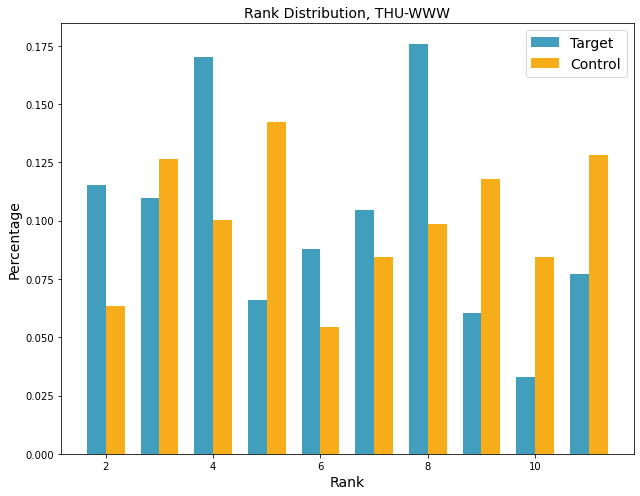

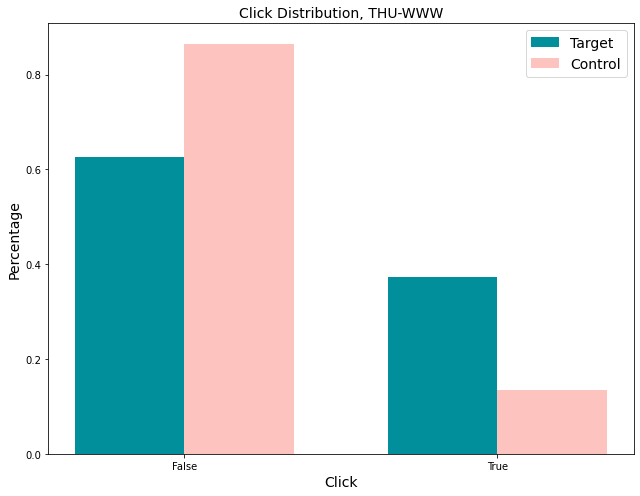

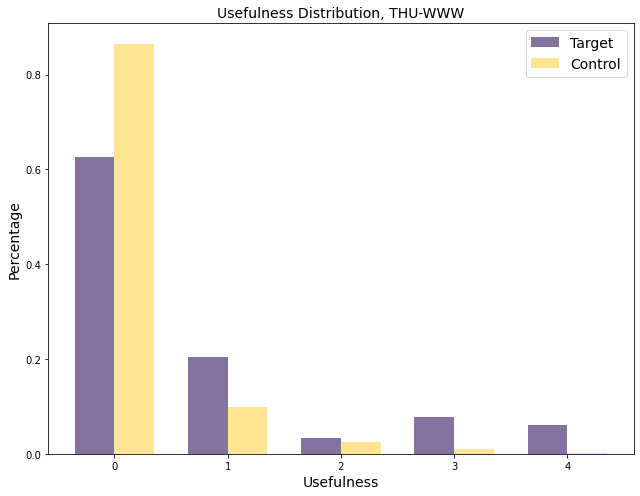

In [129]:
# Plot Rank Distribution and save as PDF
plot_and_save_chart(ranks, target_ranks_percentage, control_ranks_percentage, 
                    'Rank Distribution, THU-WWW', 'Rank', 'Percentage', 'www_rank','#429EBD', '#F7AD19',(9,7))

# Plot Click Distribution and save as PDF
plot_and_save_chart(click_labels, target_clicks_percentage, control_clicks_percentage, 
                    'Click Distribution, THU-WWW', 'Click', 'Percentage', 'www_click_prob','#018F9C','#FDC3BE',(9,7))

# Plot Usefulness Distribution and save as PDF
plot_and_save_chart(usefulness_values, target_usefulness_percentage, control_usefulness_percentage, 
                    'Usefulness Distribution, THU-WWW', 'Usefulness', 'Percentage', 'www_usefulness', '#83739E', '#FFE494',(9,7))

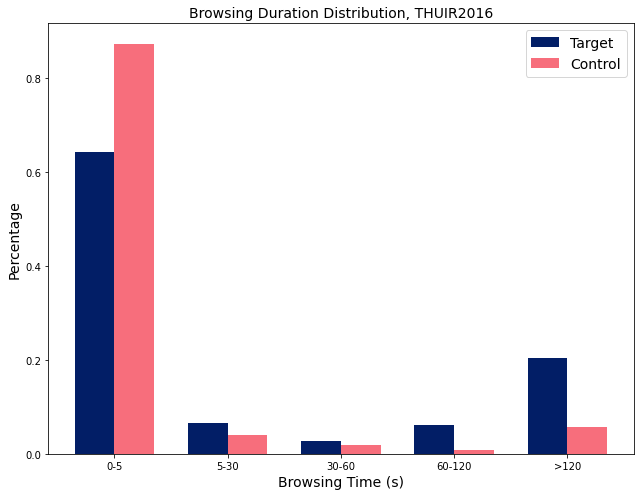

In [130]:
import matplotlib.pyplot as plt

# Extract rank, click, usefulness, and last_time values
def extract_values(data):
    ranks = [item['rank'] for item in data]
    clicks = [item['click'] for item in data]
    usefulness = [item['usefulness'] for item in data]
    last_times = [item['last_time'] for item in data]
    return ranks, clicks, usefulness, last_times

# Function to group last_time into categories
def group_last_time(last_times):
    grouped_last_times = []
    for time in last_times:
        if time <= 5:
            grouped_last_times.append('0-5')
        elif time <= 30:
            grouped_last_times.append('5-30')
        elif time <= 60:
            grouped_last_times.append('30-60')
        elif time <= 120:
            grouped_last_times.append('60-120')
        else:
            grouped_last_times.append('>120')
    return grouped_last_times

# Adjust the percentage calculation to account for ordering
def calculate_percentage_ordered(values, unique_values):
    total_len = len(values)
    return [values.count(val) / total_len for val in unique_values]

# Extract and group last_time values
target_ranks, target_clicks, target_usefulness, target_last_times = extract_values(target_doc_interaction)
control_ranks, control_clicks, control_usefulness, control_last_times = extract_values(control_doc_interaction)

target_grouped_last_times = group_last_time(target_last_times)
control_grouped_last_times = group_last_time(control_last_times)

# Get unique values for ordering
last_time_labels = ['0-5', '5-30', '30-60', '60-120', '>120']

# Calculate ordered percentages
target_last_times_percentage = calculate_percentage_ordered(target_grouped_last_times, last_time_labels)
control_last_times_percentage = calculate_percentage_ordered(control_grouped_last_times, last_time_labels)

# Plot and save chart
plot_and_save_chart(last_time_labels, target_last_times_percentage, control_last_times_percentage,
                    'Browsing Duration Distribution, THUIR2016', 'Browsing Time (s)', 'Percentage',
                    'thuir2_time', '#021E66', '#F76E7C',(9,7))

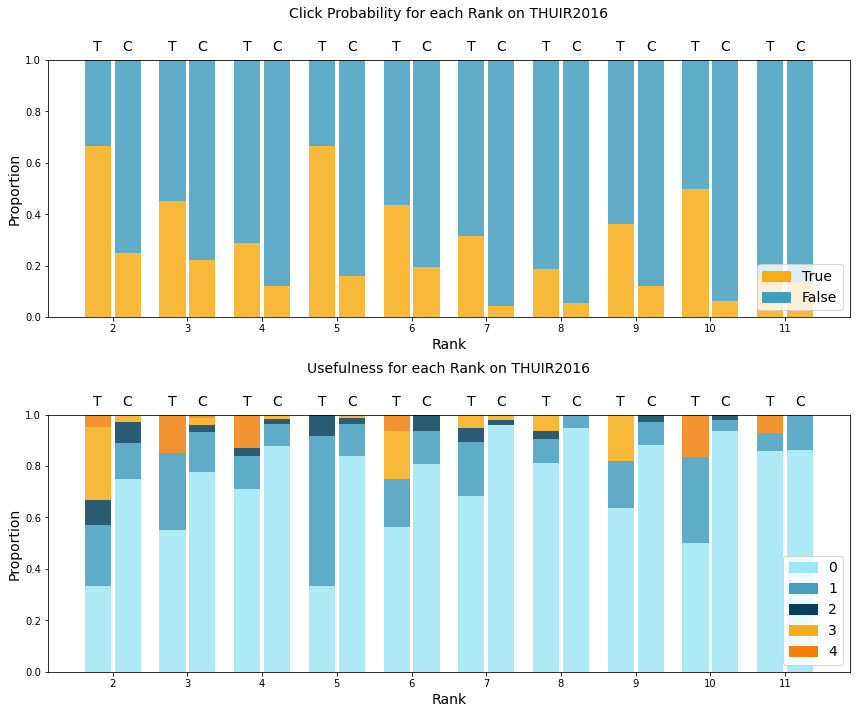

In [131]:
import os
# Color mapping for click values
click_color_mapping = {'True': '#F7AD19', 'False': '#429EBD'}
usefulness_color_mapping = {0: '#9FE7F5', 1: '#429EBD', 2: '#053F5C', 3: '#F7AD19', 4: '#F27F0C'}

# To store the proportions of click True/False for each rank for control group
control_click_proportions = {}

# To store the proportions of usefulness 0/1/2/3/4 for each rank for control group
control_usefulness_proportions = {}

# Function to calculate the proportions for click and usefulness for given data
def calculate_proportions(data, click_proportions, usefulness_proportions):
    for entry in data:
        rank = entry['rank'] + 1
        click = entry['click']
        usefulness = entry['usefulness']

        # Initialize the dictionaries if the rank is encountered for the first time
        if rank not in click_proportions:
            click_proportions[rank] = {'True': 0, 'False': 0}
        if rank not in usefulness_proportions:
            usefulness_proportions[rank] = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

        # Increment the count of click True/False and usefulness 0/1/2/3/4 for the respective rank
        click_proportions[rank][str(click)] += 1
        usefulness_proportions[rank][usefulness] += 1

    # Calculate the proportions
    for rank in click_proportions:
        total = sum(click_proportions[rank].values())
        click_proportions[rank] = {k: v / total for k, v in click_proportions[rank].items()}

    for rank in usefulness_proportions:
        total = sum(usefulness_proportions[rank].values())
        usefulness_proportions[rank] = {k: v / total for k, v in usefulness_proportions[rank].items()}

    return click_proportions, usefulness_proportions

# Calculating proportions for target and control data
click_proportions, usefulness_proportions = calculate_proportions(target_doc_interaction, {}, {})
control_click_proportions, control_usefulness_proportions = calculate_proportions(control_doc_interaction, {}, {})

# Function to plot histograms with separate bars for target and control for each rank
def plot_histogram(ax, target_proportions, control_proportions, title, ylabel, unique_values, color_mapping):
    all_ranks = sorted(set(target_proportions.keys()).union(control_proportions.keys()))
    bar_width = 0.35  # the width of the bars
    gap_width = 0.05  # the gap between bars of target and control
    
    for rank in all_ranks:
        target_values = target_proportions.get(rank, {})
        control_values = control_proportions.get(rank, {})
        
        # Position of the bars
        target_position = rank - (bar_width + gap_width) / 2
        control_position = rank + (bar_width + gap_width) / 2
        
        # Plotting bars for target
        bottom = 0
        for value in unique_values:
            proportion = target_values.get(value, 0)
            ax.bar(target_position, proportion, width=bar_width, color=color_mapping[value], bottom=bottom, alpha=0.85)
            bottom += proportion
        
        # Plotting bars for control
        bottom = 0
        for value in unique_values:
            proportion = control_values.get(value, 0)
            ax.bar(control_position, proportion, width=bar_width, color=color_mapping[value], bottom=bottom, alpha=0.85)
            bottom += proportion
    
    ax.set_xlabel('Rank', fontsize=14)
    ax.set_ylim(0, 1)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, y=1.14, fontsize=14)
    ax.set_xticks(all_ranks)
    
    # Adding text to indicate which bar is target and which is control
    for rank in all_ranks:
        ax.text(rank - (bar_width + gap_width) / 2, 1.05, 'T', ha='center', va='center', fontsize=14, transform=ax.get_xaxis_transform())
        ax.text(rank + (bar_width + gap_width) / 2, 1.05, 'C', ha='center', va='center', fontsize=14, transform=ax.get_xaxis_transform())
    
    # Simplified legend
    legend_labels = {v: k for k, v in color_mapping.items()}
    handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in color_mapping.values()]
    ax.legend(handles, [legend_labels[color] for color in color_mapping.values()], loc='lower right', fontsize=14)


# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plotting the histogram for Click Proportions
plot_histogram(axs[0], click_proportions, control_click_proportions, 'Click Probability for each Rank on THUIR2016', 'Proportion', ['True', 'False'], click_color_mapping)

# Plotting the histogram for Usefulness Proportions
plot_histogram(axs[1], usefulness_proportions, control_usefulness_proportions, 'Usefulness for each Rank on THUIR2016', 'Proportion', [0, 1, 2, 3, 4], usefulness_color_mapping)

plt.tight_layout()


# Function to save the histograms to files
def save_histogram(target_proportions, control_proportions, title, ylabel, unique_values, color_mapping, filename):
    fig, ax = plt.subplots(figsize=(10, 4))
    plot_histogram(ax, target_proportions, control_proportions, title, ylabel, unique_values, color_mapping)
    plt.tight_layout()
    #plt.show()
    plt.savefig(filename)
    plt.close(fig)

# Saving the histogram for Click Proportions
click_plot_filepath = save_histogram(click_proportions, control_click_proportions, 'Click probability for each rank on THUIR2016', 'Proportion', ['True', 'False'], click_color_mapping, './output/fig/thuir2_click_proportions_plot.pdf')

# Saving the histogram for Usefulness Proportions
usefulness_plot_filepath = save_histogram(usefulness_proportions, control_usefulness_proportions, 'Usefulness for each rank on THUIR2016', 'Proportion', [0, 1, 2, 3, 4], usefulness_color_mapping, './output/fig/thuir2_usefulness_proportions_plot.pdf')







In [132]:
# Define the bins for mapping the last_time to discrete intervals
bins = [0, 5, 30, 60, 120, float('inf')]
labels = ['0-5', '5-30', '30-60', '60-120', '>120']

# Function to map the last_time to discrete intervals
def map_last_time_to_interval(data):
    last_time_intervals = {}
    for entry in data:
        rank = entry['rank']
        last_time = entry['last_time']
        
        # Find the corresponding interval for the last_time
        for i, b in enumerate(bins):
            if last_time <= b:
                interval = labels[i] if i == 0 else labels[i - 1]
                break
        
        # Update the last_time_intervals dictionary
        if rank not in last_time_intervals:
            last_time_intervals[rank] = {label: 0 for label in labels}
        last_time_intervals[rank][interval] += 1
        
    # Calculate proportions for each rank
    for rank, intervals in last_time_intervals.items():
        total = sum(intervals.values())
        last_time_intervals[rank] = {interval: count / total for interval, count in intervals.items()}
    
    return last_time_intervals

# Map the last_time to discrete intervals for target and control groups
target_last_time_intervals = map_last_time_to_interval(target_doc_interaction)
control_last_time_intervals = map_last_time_to_interval(control_doc_interaction)
#print(control_last_time_intervals)
# Color mapping for last_time values
last_time_color_mapping = {'0-5': '#83739E', '5-30': '#018F9C', '30-60': '#FE7B72', '60-120': '#FDC3BE',  '>120': '#FFE494'}

# Saving the histogram for Last Time Proportions
last_time_plot_filepath = save_histogram(target_last_time_intervals, control_last_time_intervals, 'Browsing time for each rank on THUIR2016', 'Proportion', labels, last_time_color_mapping, './output/fig/thuir2_last_time_proportions_plot.pdf')

# Returning the file path of the saved plot
last_time_plot_filepath

In [133]:
from scipy import stats
from scipy.stats import chi2_contingency
import collections

target_rank = [entry['rank'] for entry in target_doc_interaction]
control_rank = [entry['rank'] for entry in control_doc_interaction]

# Count the frequency of each rank in both target and control groups
target_rank_count = collections.Counter(target_rank)
control_rank_count = collections.Counter(control_rank)

# Create a list of all unique ranks
all_ranks = list(set(target_rank + control_rank))

# Create frequency lists for target and control, ensuring each rank is represented
target_freq = [target_rank_count.get(rank, 0) for rank in all_ranks]
control_freq = [control_rank_count.get(rank, 0) for rank in all_ranks]

# Perform Chi-Square Test
chi2, p_value, _, _ = chi2_contingency([target_freq, control_freq])

chi2, p_value

(40.242430051970906, 6.8672443614328495e-06)

In [134]:



# Calculate metrics for a given interaction list
def calculate_metrics(interaction_list):
    click_probs = [1 if interaction['click'] else 0 for interaction in interaction_list]
    avg_click_prob = sum(click_probs) / len(interaction_list)

    browsing_times = [interaction['last_time'] if interaction['click'] else 0 for interaction in interaction_list]
    avg_browsing_time = sum(browsing_times) / len(interaction_list)

    usefulness_scores = [interaction['usefulness'] for interaction in interaction_list]
    avg_usefulness = sum(usefulness_scores) / len(interaction_list)
    
    ranks = [entry['rank'] for entry in interaction_list]
    avg_rank = np.mean(ranks)
    
    return avg_click_prob, avg_browsing_time, avg_usefulness, avg_rank

# Calculate the metrics for both interaction lists
target_avg_click_prob, target_avg_browsing_time, target_avg_usefulness, target_avg_rank = calculate_metrics(target_doc_interaction)
control_avg_click_prob, control_avg_browsing_time, control_avg_usefulness, control_avg_rank = calculate_metrics(control_doc_interaction)

# Conduct t-tests to compare the means
click_prob_t_stat, click_prob_p_val = stats.ttest_ind([interaction['click'] for interaction in target_doc_interaction],
                                                     [interaction['click'] for interaction in control_doc_interaction])

browsing_time_t_stat, browsing_time_p_val = stats.ttest_ind(
    [interaction['last_time'] if interaction['click'] else 0 for interaction in target_doc_interaction],
    [interaction['last_time'] if interaction['click'] else 0 for interaction in control_doc_interaction]
)

usefulness_t_stat, usefulness_p_val = stats.ttest_ind([interaction['usefulness'] for interaction in target_doc_interaction],
                                                     [interaction['usefulness'] for interaction in control_doc_interaction])


rank_t_stat, rank_p_val = stats.ttest_ind([interaction['rank'] for interaction in target_doc_interaction],
                                                     [interaction['rank'] for interaction in control_doc_interaction])

{
    "target_metrics": {
        "avg_click_prob": target_avg_click_prob,
        "avg_browsing_time": target_avg_browsing_time,
        "avg_usefulness": target_avg_usefulness,
        "avg_rank": target_avg_rank,
    },
    "control_metrics": {
        "avg_click_prob": control_avg_click_prob,
        "avg_browsing_time": control_avg_browsing_time,
        "avg_usefulness": control_avg_usefulness,
        "avg_rank": control_avg_rank,
    },
    "t_test_results": {
        "click_prob": {"t_stat": click_prob_t_stat, "p_val": click_prob_p_val},
        "browsing_time": {"t_stat": browsing_time_t_stat, "p_val": browsing_time_p_val},
        "usefulness": {"t_stat": usefulness_t_stat, "p_val": usefulness_p_val},
        "rank": {"t_stat": rank_t_stat, "p_val": rank_p_val},
    }
}

{'target_metrics': {'avg_click_prob': 0.37362637362637363,
  'avg_browsing_time': 100.72546703296702,
  'avg_usefulness': 0.7417582417582418,
  'avg_rank': 4.956043956043956},
 'control_metrics': {'avg_click_prob': 0.13532513181019332,
  'avg_browsing_time': 21.67698066783832,
  'avg_usefulness': 0.18629173989455183,
  'avg_rank': 5.637961335676626},
 't_test_results': {'click_prob': {'t_stat': 7.329607383979098,
   'p_val': 5.992266568749628e-13},
  'browsing_time': {'t_stat': 6.851190965136473,
   'p_val': 1.5291245938611222e-11},
  'usefulness': {'t_stat': 8.657989647334572, 'p_val': 2.923700550611697e-17},
  'rank': {'t_stat': -2.802947088400126, 'p_val': 0.005194691072740198}}}

In [135]:
# Split the interactions into three groups based on rank
def split_by_rank(interactions):
    group1 = [item for item in interactions if 0 <= item['rank'] <= 4]
    group2 = [item for item in interactions if 5 <= item['rank'] <= 9]
    return group1, group2

# Split target and control interactions by rank
target_groups = split_by_rank(target_doc_interaction)
control_groups = split_by_rank(control_doc_interaction)

# Calculate metrics for each group and perform t-tests
results = []

for i in range(2):
    target_metrics = calculate_metrics(target_groups[i])
    control_metrics = calculate_metrics(control_groups[i])

    click_prob_ttest = stats.ttest_ind([entry['click'] for entry in target_groups[i]], [entry['click'] for entry in control_groups[i]])
    rank_ttest = stats.ttest_ind([entry['rank'] for entry in target_groups[i]], [entry['rank'] for entry in control_groups[i]])
    view_time_ttest = stats.ttest_ind([entry['last_time'] if entry['click'] else 0 for entry in target_groups[i]], 
                                [entry['last_time'] if entry['click'] else 0 for entry in control_groups[i]])
    usefulness_ttest = stats.ttest_ind([entry['usefulness'] for entry in target_groups[i]], [entry['usefulness'] for entry in control_groups[i]])

    results.append({
        'group': i+1,
        'target_metrics': target_metrics,
        'control_metrics': control_metrics,
        'click_prob_ttest': click_prob_ttest,
        'view_time_ttest': view_time_ttest,
        'usefulness_ttest': usefulness_ttest,
        'rank_ttest': rank_ttest,
    })

results

[{'group': 1,
  'target_metrics': (0.47619047619047616,
   129.63673809523806,
   0.9523809523809523,
   2.4047619047619047),
  'control_metrics': (0.18292682926829268,
   32.41127235772358,
   0.2682926829268293,
   2.7439024390243905),
  'click_prob_ttest': Ttest_indResult(statistic=5.531968315806058, pvalue=6.481502692529075e-08),
  'view_time_ttest': Ttest_indResult(statistic=4.915917657036069, pvalue=1.3989377714570988e-06),
  'usefulness_ttest': Ttest_indResult(statistic=6.199269688546949, pvalue=1.7034846715824568e-09),
  'rank_ttest': Ttest_indResult(statistic=-2.536718758310083, pvalue=0.011652818455732494)},
 {'group': 2,
  'target_metrics': (0.30952380952380953,
   81.18634523809524,
   0.5952380952380952,
   6.666666666666667),
  'control_metrics': (0.088, 12.905948000000004, 0.12, 7.212),
  'click_prob_ttest': Ttest_indResult(statistic=5.19087393365188, pvalue=3.654317630961692e-07),
  'view_time_ttest': Ttest_indResult(statistic=4.7401737860729485, pvalue=3.17295951940844

## Chi-square test

In [136]:
from scipy import stats
from scipy.stats import chi2_contingency
import collections

target_rank = [entry['rank'] for entry in target_doc_interaction]
control_rank = [entry['rank'] for entry in control_doc_interaction]

# Count the frequency of each rank in both target and control groups
target_rank_count = collections.Counter(target_rank)
control_rank_count = collections.Counter(control_rank)

# Create a list of all unique ranks
all_ranks = list(set(target_rank + control_rank))

# Create frequency lists for target and control, ensuring each rank is represented
target_freq = [target_rank_count.get(rank, 0) for rank in all_ranks]
control_freq = [control_rank_count.get(rank, 0) for rank in all_ranks]

# Perform Chi-Square Test
chi2, p_value, _, _ = chi2_contingency([target_freq, control_freq])

chi2, p_value

(40.242430051970906, 6.8672443614328495e-06)

# Effect of Decoy - logistic regression

## merge data

In [145]:
import pandas as pd
from sklearn.linear_model import LogisticRegression


#Add 'has_decoy' attribute and merge the two lists
for entry in control_doc_interaction:
    entry['has_decoy'] = 0

for entry in target_doc_interaction:
    entry['has_decoy'] = 1

merged_data = control_doc_interaction + target_doc_interaction

# Convert the merged data to a DataFrame for easier manipulation
df = pd.DataFrame(merged_data)

# Create dummy variables for categorical variables
dummy_fields = ['rank', 
                'task_id', 'student_id', 
                #'relevance'
               ]
for field in dummy_fields:
    dummies = pd.get_dummies(df[field], prefix=field, drop_first=True)
    df = pd.concat([df, dummies], axis=1)

# Drop original categorical fields and other non-predictor fields
fields_to_drop = ['docno', 'rank', 'last_time', 'usefulness', 'student_id', 'task_id', 'relevance']
df = df.drop(fields_to_drop, axis=1)



In [146]:
from sklearn.linear_model import LogisticRegression

# Features (X) and Labels (y) for 'click'
X_click = df.drop(['click'], axis=1)
y_click = df['click']


In [147]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.5):
    # https://stackoverflow.com/a/39813304/1956309
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

# min_variance = .9 * (1 - .9)  # You can play here with different values.
min_variance = 0.1
low_variance = variance_threshold_selector(df, min_variance) 
print('columns removed:')
df.columns ^ low_variance.columns
df.shape
df.shape
X = low_variance

columns removed:


/var/folders/7k/8q9xq4596mb6rkfh3c6gknc00000gn/T/ipykernel_95233/3194216113.py:13: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  df.columns ^ low_variance.columns


In [148]:
import statsmodels.api as sm

# Add constant for intercept term
X_click_const = sm.add_constant(X_click)

# Logistic regression for 'click'
logit_model_click = sm.Logit(y_click, X_click_const)
result_click = logit_model_click.fit(disp=0)


# Summary tables, which include p-values
summary_click = result_click.summary()

summary_click

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  click   No. Observations:                  751
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                           42
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                  0.1676
Time:                        21:21:52   Log-Likelihood:                -306.73
converged:                       True   LL-Null:                       -368.48
Covariance Type:            nonrobust   LLR p-value:                 5.952e-10
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0191      0.695      0.028      0.978      -1.343       1.381
has_decoy                 1.5892      0.233      6.831      0.000       1.133       2.045
rank_2                   -0.3225      0.402     -0.803      0.422      -1.110       0.465
rank_3                   -1.1330      0.432     -2.625      0.009      -1.979      -0.287
rank_4                   -0.5910      0.419     -1.410      0.159      -1.413       0.231
rank_5                   -0.5469      0.486     -1.126      0.260      -1.499       0.405
rank_6                   -1.7969      0.513     -3.503      0.000      -2.802      -0.792
rank_7                   -2.2920      0.507     -4.523      0.000      -3.285      -1.299
rank_8                   -1.3173      0.480     -2.744      0.006      -2.258      -0.376
rank_9                   -1.4916      0.562     -2.655      0.008      -2.593      -0.390
rank_10                  -1.2324      0.458     -2.692      0.007      -2.130      -0.335
task_id_2                 0.1934      0.318      0.609      0.543      -0.429       0.816
task_id_3                 0.1226      0.307      0.400      0.689      -0.478       0.724
task_id_4                 0.9749      0.418      2.330      0.020       0.155       1.795
task_id_5                -1.0417      0.430     -2.420      0.016      -1.885      -0.198
task_id_6                -0.3895      0.445     -0.875      0.381      -1.262       0.483
student_id_2013010436    -0.5581      0.728     -0.767      0.443      -1.985       0.869
student_id_2013010439    -0.4449      0.871     -0.511      0.609      -2.152       1.262
student_id_2013010441    -1.7506      0.755     -2.317      0.020      -3.231      -0.270
student_id_2013010444    -1.1703      0.856     -1.366      0.172      -2.849       0.508
student_id_2013010452    -0.5651      0.735     -0.768      0.442      -2.006       0.876
student_id_2014010440    -0.4025      0.821     -0.490      0.624      -2.012       1.207
student_id_2014010444    -1.3753      1.211     -1.136      0.256      -3.749       0.998
student_id_2014010452    -1.7642      0.848     -2.081      0.037      -3.426      -0.103
student_id_2014012462    -1.3900      0.841     -1.654      0.098      -3.038       0.258
student_id_2014030054    -0.9015      0.810     -1.112      0.266      -2.490       0.687
student_id_2014030075    -1.9685      1.261     -1.561      0.118      -4.439       0.503
student_id_2014030076    -1.5242      0.887     -1.719      0.086      -3.262       0.214
student_id_2014030077    -1.2878      0.731     -1.762      0.078      -2.720       0.145
student_id_2014080124    -1.3624      0.779     -1.749      0.080      -2.890       0.165
student_id_2014080129    -1.1798      0.786     -1.501      0.133      -2.720       0.360
student_id_2015010416    -0.9999      0.820     -1.219      0.223      -2.608       0.608
student_id_2015010433    -0.6689      0.711     -0.941      0.347      -2.062       0.724
s

In [149]:
# Convert the merged data to a DataFrame for easier manipulation
merged_df = pd.DataFrame(merged_data)

# Create dummy variables for categorical variables
dummy_fields_ols = ['rank', 'task_id', 'student_id',
                     #'relevance'
                   ]
for field in dummy_fields_ols:
    dummies = pd.get_dummies(merged_df[field], prefix=field, drop_first=True)
    merged_df = pd.concat([merged_df, dummies], axis=1)

# Drop original categorical fields
fields_to_drop_ols = ['docno', 'click',  'student_id', 'task_id', 'relevance', 'rank']
df_ols = merged_df.drop(fields_to_drop_ols, axis=1)

# Show the first few rows to confirm the changes
df_ols.head()

,last_time,usefulness,has_decoy,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,...,student_id_2015012338,student_id_2015012385,student_id_2015012386,student_id_2015012392,student_id_2015012395,student_id_2015012843,student_id_2015012851,student_id_2015012867,student_id_2015012880,student_id_2016012873
0,0.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,48.008,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
import statsmodels.api as sm

# Features (X) and Labels (y) for 'last_time'
X_last_time = df_ols.drop(['last_time', 'usefulness'], axis=1)
y_last_time = df_ols['last_time']

# Add constant for intercept term
X_last_time_const = sm.add_constant(X_last_time)

# OLS regression for 'last_time'
ols_model_last_time = sm.OLS(y_last_time, X_last_time_const)
result_last_time = ols_model_last_time.fit()

# Summary table, which includes p-values
summary_last_time = result_last_time.summary()
summary_last_time

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              last_time   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     2.583
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.90e-07
Time:                        21:22:08   Log-Likelihood:                -4720.5
No. Observations:                 751   AIC:                             9527.
Df Residuals:                     708   BIC:                             9726.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    75.7260     39.839      1.901      0.058      -2.490     153.942
has_decoy                78.8804     12.092      6.524      0.000      55.140     102.620
rank_2                  -34.9981     23.082     -1.516      0.130     -80.316      10.320
rank_3                  -39.6023     23.424     -1.691      0.091     -85.591       6.386
rank_4                  -35.5451     23.352     -1.522      0.128     -81.393      10.303
rank_5                  -25.1699     26.918     -0.935      0.350     -78.019      27.679
rank_6                  -70.4364     24.743     -2.847      0.005    -119.015     -21.857
rank_7                  -76.4968     23.531     -3.251      0.001    -122.696     -30.298
rank_8                  -59.5687     24.593     -2.422      0.016    -107.852     -11.285
rank_9                  -56.7407     26.307     -2.157      0.031    -108.390      -5.092
rank_10                 -54.3934     23.768     -2.289      0.022    -101.058      -7.729
task_id_2                21.4795     15.841      1.356      0.176      -9.622      52.581
task_id_3                21.4390     15.488      1.384      0.167      -8.969      51.847
task_id_4                32.5452     22.205      1.466      0.143     -11.050      76.141
task_id_5               -20.1461     18.696     -1.078      0.282     -56.853      16.561
task_id_6               -16.5714     19.525     -0.849      0.396     -54.906      21.763
student_id_2013010436   -20.9435     40.570     -0.516      0.606    -100.595      58.708
student_id_2013010439   -17.2293     47.599     -0.362      0.717    -110.680      76.222
student_id_2013010441   -38.7883     38.914     -0.997      0.319    -115.190      37.613
student_id_2013010444    69.2931     44.884      1.544      0.123     -18.829     157.415
student_id_2013010452   -38.4081     40.708     -0.943      0.346    -118.332      41.516
student_id_2014010440   -29.2455     45.921     -0.637      0.524    -119.402      60.911
student_id_2014010444   -28.7349     51.404     -0.559      0.576    -129.658      72.188
student_id_2014010452   -52.0265     42.842     -1.214      0.225    -136.139      32.086
student_id_2014012462   -17.7316     42.625     -0.416      0.678    -101.418      65.954
student_id_2014030054   -16.6990     44.712     -0.373      0.709    -104.482      71.084
student_id_2014030075   -39.7124     49.764     -0.798      0.425    -137.415      57.990
student_id_2014030076   -37.2334     41.469     -0.898      0.370    -118.651      44.184
student_id_2014030077   -46.9745     39.491     -1.190      0.235    -124.508      30.559
student_id_2014080124    -9.8863     41.300     -0.239      0.811     -90.971      71.199
student_id_2014080129    25.6579     42.227      0.608      0.544     -57.247     108.563
student_id_2015010416  

In [151]:
# Features (X) and Labels (y) for 'usefulness'
X_usefulness = df_ols.drop(['last_time','usefulness'], axis=1)
y_usefulness = df_ols['usefulness']

# Add constant for intercept term
X_usefulness_const = sm.add_constant(X_usefulness)

# OLS regression for 'usefulness'
ols_model_usefulness = sm.OLS(y_usefulness, X_usefulness_const)
result_usefulness = ols_model_usefulness.fit()

# Summary table, which includes p-values
summary_usefulness = result_usefulness.summary()
summary_usefulness

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             usefulness   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     3.609
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.19e-12
Time:                        21:22:18   Log-Likelihood:                -814.91
No. Observations:                 751   AIC:                             1716.
Df Residuals:                     708   BIC:                             1915.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.7026      0.220      3.198      0.001       0.271       1.134
has_decoy                 0.5515      0.067      8.272      0.000       0.421       0.682
rank_2                   -0.2544      0.127     -1.999      0.046      -0.504      -0.005
rank_3                   -0.3960      0.129     -3.066      0.002      -0.650      -0.142
rank_4                   -0.3938      0.129     -3.058      0.002      -0.647      -0.141
rank_5                   -0.2861      0.148     -1.928      0.054      -0.578       0.005
rank_6                   -0.5642      0.136     -4.135      0.000      -0.832      -0.296
rank_7                   -0.6989      0.130     -5.386      0.000      -0.954      -0.444
rank_8                   -0.5101      0.136     -3.762      0.000      -0.776      -0.244
rank_9                   -0.4864      0.145     -3.353      0.001      -0.771      -0.202
rank_10                  -0.5037      0.131     -3.843      0.000      -0.761      -0.246
task_id_2                 0.1524      0.087      1.745      0.081      -0.019       0.324
task_id_3                 0.1243      0.085      1.455      0.146      -0.043       0.292
task_id_4                 0.3405      0.122      2.781      0.006       0.100       0.581
task_id_5                -0.1561      0.103     -1.514      0.130      -0.358       0.046
task_id_6                -0.0422      0.108     -0.392      0.695      -0.254       0.169
student_id_2013010436    -0.0205      0.224     -0.091      0.927      -0.460       0.419
student_id_2013010439    -0.0717      0.262     -0.273      0.785      -0.587       0.444
student_id_2013010441    -0.3786      0.215     -1.765      0.078      -0.800       0.043
student_id_2013010444     0.0517      0.247      0.209      0.835      -0.434       0.538
student_id_2013010452    -0.1379      0.224     -0.614      0.539      -0.579       0.303
student_id_2014010440     0.0219      0.253      0.087      0.931      -0.475       0.519
student_id_2014010444    -0.2650      0.283     -0.935      0.350      -0.822       0.291
student_id_2014010452    -0.3287      0.236     -1.391      0.165      -0.792       0.135
student_id_2014012462    -0.1851      0.235     -0.787      0.431      -0.647       0.276
student_id_2014030054    -0.2322      0.247     -0.942      0.346      -0.716       0.252
student_id_2014030075    -0.0906      0.274     -0.330      0.741      -0.629       0.448
student_id_2014030076    -0.2656      0.229     -1.162      0.246      -0.715       0.183
student_id_2014030077    -0.2447      0.218     -1.124      0.262      -0.672       0.183
student_id_2014080124    -0.2787      0.228     -1.224      0.221      -0.726       0.168
student_id_2014080129    -0.1447      0.233     -0.621      0.535      -0.602       0.312
student_id_2015010416  

# Effect of Decoy (distance?)

In [155]:
relevance_data = url_rel_map_adjusted

In [156]:
# Initialize the maps
improved_target_map = {}
#improved_decoy_map = {}

for item in decoy_pair:
    # Keys for target and decoy maps
    key_t = (item['session_num'], item['interaction_num'], item['docno_target'])
    key_d = (item['session_num'], item['interaction_num'], item['docno_decoy'])
    
    # Calculate similarity
    docno1, docno2 = sorted([item['docno_target'], item['docno_decoy']])
    similarity_value = similarity_scores.get(docno1, {}).get(docno2, 0)
    
    # New data to be inserted/updated
    new_data = {
        'docno_target': item['docno_target'],
        'rank_target': item['rank_target'],
        'docno_decoy': item['docno_decoy'],
        'rank_decoy': item['rank_decoy'],
        'relevance_target': relevance_data.get(item['docno_target'], 0),
        'relevance_decoy': relevance_data.get(item['docno_decoy'], 0),
        'similarity': similarity_value
    }
    
    # Update the target map
    update_flag = False  # To keep track if we should also update the decoy map
    if key_t in improved_target_map:
        #print("Target document with more than 1 decoys." +
        #    "new: %d existing %d"%(int(item['rank_decoy']), int(improved_target_map[key_t]['rank_decoy'])))
        if int(item['rank_decoy']) < int(improved_target_map[key_t]['rank_decoy']):
            improved_target_map[key_t] = new_data
            update_flag = True  # We found a better rank for decoy, so we should update the decoy map as well
    else:
        improved_target_map[key_t] = new_data
    
    # Update the decoy map only if we found a better rank for decoy
    if update_flag:
        #print('decoy update!')
        # Remove the previous entry from decoy map
        old_key_d = (item['session_num'], item['interaction_num'], improved_target_map[key_t]['docno_decoy'])
        #if old_key_d in improved_decoy_map:
        #    del improved_decoy_map[old_key_d]
        
    # Add the new entry to decoy map
    #improved_decoy_map[key_d] = new_data

# Print some items for review
print("Improved Target Map:")
print(len(improved_target_map))
print(dict(list(improved_target_map.items())[:5]))
#print("\nImproved Decoy Map:")
#print(len(improved_decoy_map))
#print(dict(list(improved_decoy_map.items())[:5]))

Improved Target Map:
308
{('2013010441_1', '1', 'http://news.qq.com/a/20111202/000143.htm'): {'docno_target': 'http://news.qq.com/a/20111202/000143.htm', 'rank_target': 2, 'docno_decoy': 'http://www.china.com.cn/travel/txt/2011-12/02/content_24055284_2.htm', 'rank_decoy': 3, 'relevance_target': 0, 'relevance_decoy': 0, 'similarity': 0.678}, ('2013010441_1', '4', 'http://mall.cnki.net/magazine/article/HJKX200001000.htm'): {'docno_target': 'http://mall.cnki.net/magazine/article/HJKX200001000.htm', 'rank_target': 2, 'docno_decoy': 'http://www.wenkuxiazai.com/doc/5cc2b74ef8c75fbfc67db27a-2.html', 'rank_decoy': 1, 'relevance_target': 0, 'relevance_decoy': 0, 'similarity': 0.646}, ('2014010452_1', '5', 'http://www.cnki.com.cn/Article/CJFDTotal-HJHX201409013.htm'): {'docno_target': 'http://www.cnki.com.cn/Article/CJFDTotal-HJHX201409013.htm', 'rank_target': 3, 'docno_decoy': 'http://www.taodocs.com/p-8296749.html', 'rank_decoy': 5, 'relevance_target': 0, 'relevance_decoy': 0, 'similarity': 0.

NameError: name 'thuir2_ss' is not defined